In [1]:
import numpy as np
import time
import torch
import matplotlib.pyplot as plt
import utils
import os 
from custom_envs.Explore import Explore
from train_function.train import DDPGTrainCuriosity
from gym_pybullet_drones.utils.utils import sync, str2bool

In [2]:
env = Explore()

policy = DDPGTrainCuriosity(env, curiosity=False)
agent, return_list = policy.learn(num_episodes=10000)

[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000


Iteration 0:   1%|▌                                                                   | 9/1000 [00:02<04:15,  3.88it/s]D:\env-torch\Intrinsic Reward\curiosity\model.py:78: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  actions = torch.tensor(dict['actions'], dtype=torch.float).to(self.device)
Iteration 9: 100%|█████████████████████████████████| 1000/1000 [15:44<00:00,  1.06it/s, episode=10000, return=-1.00000]


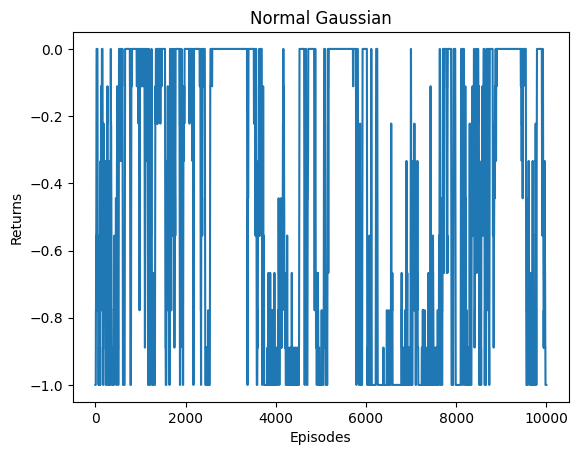

In [7]:
file_dir = './return_result/'
file_path = os.path.join(file_dir, "Normal Gaussian")

episodes = list(range(len(return_list)))
mv_return = utils.moving_average(return_list, 9)
plt.plot(episodes, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Normal Gaussian')
plt.savefig(file_path)
plt.close()

In [3]:
env_test = Explore(gui=True,
                    record=False,
                    )

obs = env_test.reset()
for i in range(100*env_test.SIM_FREQ):
    action = agent.take_action(obs)
    obs, reward, done, info = env_test.step(action)
    if i%env.SIM_FREQ == 0:
        env.render()
        print(done)
    if done:
        obs = env_test.reset()
env_test.close()

[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000
viewMatrix (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
projectionMatrix (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
[WARNING] BaseAviary.render() is implemented as text-only, re-initialize the environment using Aviary(gui=True) to use PyBullet's graphical interface

[INFO] BaseAviary.render() ——— it 0842 ——— wall-clock time 79.5s, simulation time 3.5s@240Hz (0.04x)
[INFO] BaseAviary.render() ——— drone 0 ——— x +03.01, y +02.95, z +00.14 ——— velocity +02.32, -00.07, +00.41 ——— roll +04.76, pitch +01.23, yaw -01.

In [9]:
file_name = './param_dict/' + 'ddpg_actor.pth'
torch.save(agent.actor.state_dict(), file_name)

In [2]:
env = Explore()

policy = DDPGTrainCuriosity(env)
agent, return_list = policy.learn(num_episodes=6000)

[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000


Iteration 0:   2%|█                                                                    | 9/600 [00:03<03:16,  3.01it/s]D:\env-torch\Intrinsic Reward\curiosity\model.py:78: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  actions = torch.tensor(dict['actions'], dtype=torch.float).to(self.device)
Iteration 9: 100%|████████████████████████████████████| 600/600 [10:43<00:00,  1.07s/it, episode=6000, return=-0.72057]


In [3]:
env_test = Explore(gui=True,
                    record=False,
                    )

obs = env_test.reset()
for i in range(50*env_test.SIM_FREQ):
    action = agent.take_action(obs)
    obs, reward, done, info = env_test.step(action)
    if i%env.SIM_FREQ == 0:
        env.render()
        print(done)
    if done:
        obs = env_test.reset()
env_test.close()

[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000
viewMatrix (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
projectionMatrix (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
[WARNING] BaseAviary.render() is implemented as text-only, re-initialize the environment using Aviary(gui=True) to use PyBullet's graphical interface

[INFO] BaseAviary.render() ——— it 0573 ——— wall-clock time 48.8s, simulation time 2.4s@240Hz (0.05x)
[INFO] BaseAviary.render() ——— drone 0 ——— x -00.91, y +03.00, z +00.01 ——— velocity -00.44, +01.41, +00.00 ——— roll +00.07, pitch +00.08, yaw -00.

In [4]:
file_name = './param_dict/' + 'ddpg_actor_curiosity.pth'
torch.save(agent.actor.state_dict(), file_name)